In [1]:
!pip install web3==4.2.1
from web3 import Web3
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 115 kB 3.9 MB/s 
     |████████████████████████████████| 1.6 MB 35.6 MB/s 
     |████████████████████████████████| 108 kB 44.8 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 1.9 MB 24.7 MB/s 
  Created wheel for lru-dict: filename=lru_dict-1.1.7-cp37-cp37m-linux_x86_64.whl size=28415 sha256=f1da7f18aeee5abd0edf103a9d8c56aa237d7a7a67d7d0115008d971e85f561a
  Stored in directory: /root/.cache/pip/wheels/9d/0b/4e/aa8fec9833090cd52bcd76f92f9d95e1ee7b915c12093663b4
  Created wheel for parsimonious: filename=parsimonious-0.8.1-py3-none-any.whl size=42724 sha256=5796f2777e5af0423fd4b3b22144a69fd1133cf4dd81c1be950fb638f1c733ce
  Stored in directory: /root/.cache/pip/wheels/88/5d/ba/f27d8af07306b65ee44f9d3f9cadea1db749a421a6db8a99bf
Successfully built lru-dict parsimonious


In [3]:
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/86430c2c684747dfa77d206779ad2353"))

In [5]:

%%time
n = 13541041
absolute_fee = [] 
relative_fee = [] 
block_number = []
contracts_number =[]
transactions_number = []


for i in range(n, n+100):
    block = web3.eth.getBlock(i, True)
    sum_fee = 0
    contracts = 0
    for tr in block.transactions:
        price = tr.gasPrice
        used = web3.eth.getTransactionReceipt(tr.hash).gasUsed
        sum_fee += price * used
        if tr.input != '0x': #кол-во смарт контрактов
            contracts += 1
    total_fee = sum_fee*(10**(-18))
    contracts_n = contracts 
    number = block.number
    reward = 2 + total_fee + len(block.uncles)/32 #2 - постоянная награда за блок
    
    absolute_fee.append(total_fee)
    relative_fee.append(total_fee * 100 / reward)
    block_number.append(number)
    contracts_number.append(contracts_n)
    transactions_number.append(len(block.transactions))

CPU times: user 1min 26s, sys: 3.47 s, total: 1min 29s
Wall time: 16min 6s


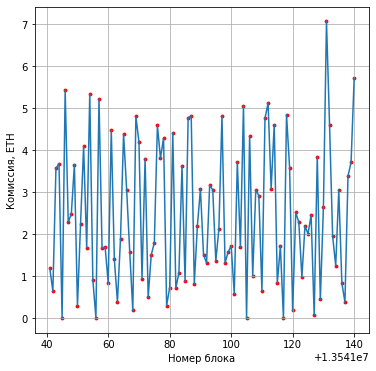

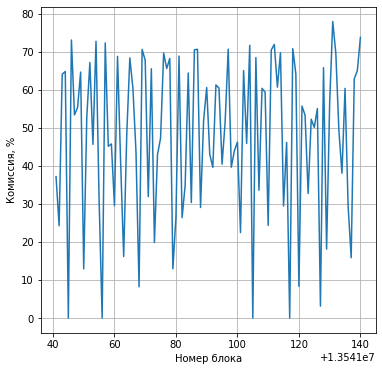

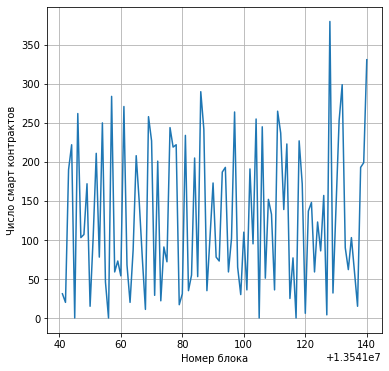

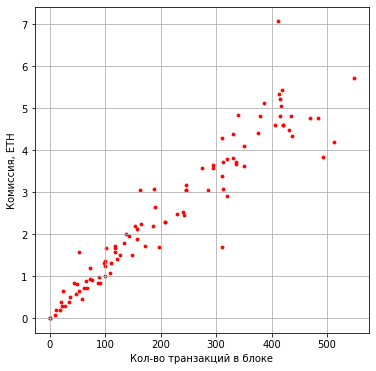

In [6]:
#графики
plt.figure(figsize=(6, 6))
plt.scatter(block_number, absolute_fee, color = 'r', s = 8)
plt.plot(block_number, absolute_fee)
plt.xlabel('Номер блока')
plt.ylabel('Комиссия, ETH')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(block_number, relative_fee)
plt.xlabel('Номер блока')
plt.ylabel('Комиссия, %')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(block_number, contracts_number)
plt.xlabel('Номер блока')
plt.ylabel('Число смарт контрактов')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(transactions_number, absolute_fee, color = 'r', s = 8)
plt.xlabel('Кол-во транзакций в блоке')
plt.ylabel('Комиссия, ETH')
plt.grid()
plt.show()